   # Exploratory Data Analysis on Haberman Dataset

**These packages help for mathematical oprations and also plotting,importing and exporting of files**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

haberman = pd.read_csv("haberman")
warnings.filterwarnings("ignore")

**Below code will show the shape of data that is the number of columns and rows present in data**


In [2]:
print(haberman.shape)

(306, 4)


**The labels of columns**

In [3]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


* **Unable distinguish between data and also there are possibilities**
* **These contain same colour**

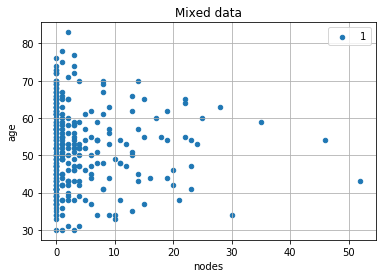

In [4]:
haberman.plot(kind='scatter', x='nodes', y='age') 
plt.title("Mixed data")
plt.grid()
plt.legend(['1'],loc='upper right')
plt.show()

**Unable distinguish between data and also there are posibilities**

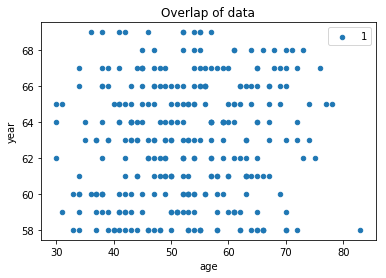

In [5]:
haberman.plot(kind='scatter',x='age',y='year');
plt.title("Overlap of data");
plt.legend(['1'],loc='upper right')
plt.show()

**Seaborn packages function which simply to distinguish data visually by allocating different colours to every classification feature**

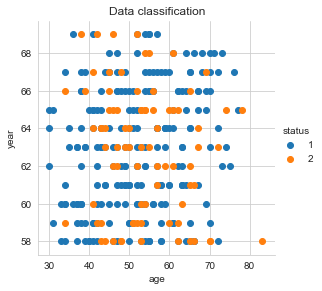

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue="status",size=4)\
   .map(plt.scatter,"age","year")\
   .add_legend();
plt.title("Data classification")
plt.show()


* **The diagnol elements are PDFs for each feature**
* **The histograms of all combinations of features which explain you the density of data by considering different features of data.**

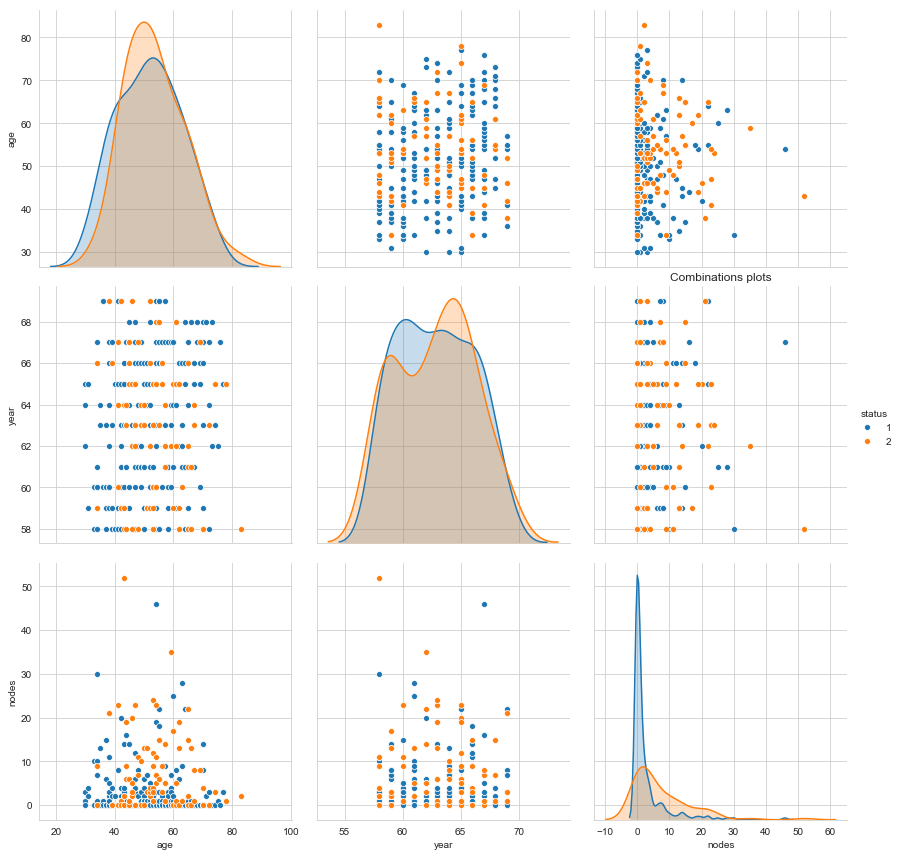

In [8]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman,vars=['age','year','nodes'],hue="status",size=4);
plt.title("Combinations plots");
plt.show()

**the data of short survival status are mostly overlap on long survival status due to which you will not able to conclude on this data**

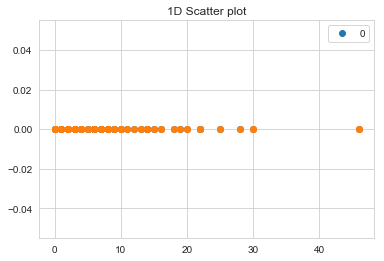

In [14]:
import numpy as np
h1 = haberman.loc[haberman["status"] == 1];
h2 = haberman.loc[haberman["status"] == 2];
plt.plot(h1['nodes'], np.zeros_like(h1['nodes']), 'o')
plt.plot(h1['nodes'], np.zeros_like(h1['nodes']), 'o')
plt.title("1D Scatter plot");
plt.legend(['0'],loc='upper right')
plt.show()

**At the age range from 30–75 the status of survival and death is same. So using this datapoint we cannot predict anything**

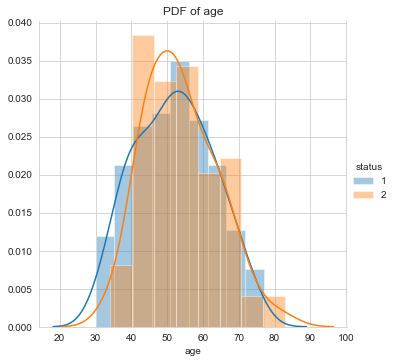

In [15]:
sns.FacetGrid(haberman,hue="status",size=5)\
   .map(sns.distplot,"age")\
   .add_legend();
plt.title("PDF of age");
plt.show();

**These histograms as there is equal number of density in each data point**

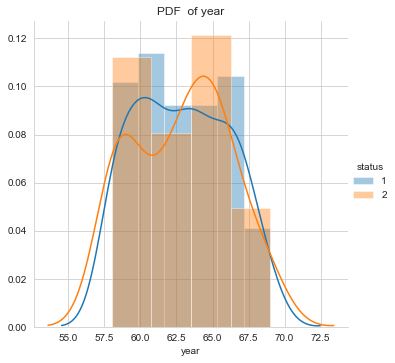

In [16]:
sns.FacetGrid(haberman,hue="status",size=5)\
   .map(sns.distplot,"year")\
   .add_legend();
plt.title("PDF  of year");
plt.show()

**people survive long if they have less axillary nodes detected**

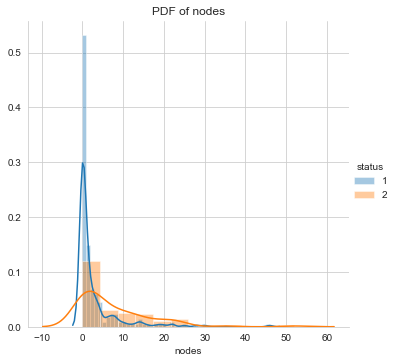

In [17]:
 sns.FacetGrid(haberman,hue="status",size=5)\
   .map(sns.distplot,"nodes")\
   .add_legend();
plt.title("PDF of nodes");
plt.show()

**CDF will give the cumulative plot of PDF so that you can calculate what are the exact percentage of patient survival status**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


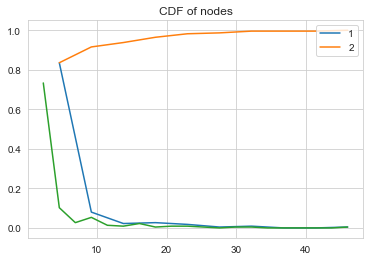

In [18]:
counts, bin_edges = np.histogram(h1['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

counts, bin_edges = np.histogram(h1['nodes'], bins=20,density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

plt.title("CDF of nodes");
plt.legend(['1','2'],loc='upper right')
plt.show();



**compute cdf using pdf by nodes**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


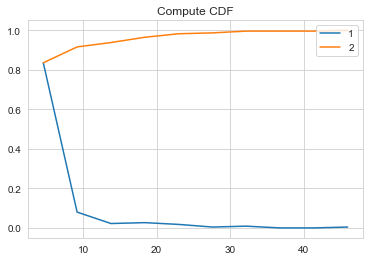

In [19]:
counts, bin_edges = np.histogram(h1['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.title("Compute CDF");
plt.legend(['1','2'],loc='upper right')
plt.show();

* **combine CDF for Long survival observation is same but in Short survival nearly 55% of people** 
* **who have nodes less than 5 and there are nearly 100% of people in short survival if nodes are > 40**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


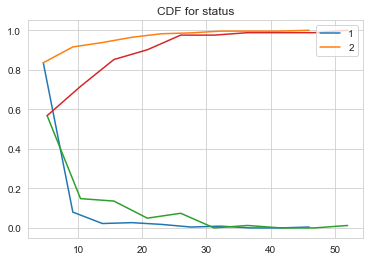

In [20]:
counts, bin_edges = np.histogram(h1['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(h2['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("CDF for status");
plt.legend(['1','2'],loc='upper right')
plt.show();

* **Mean is the average of all data**
* **Standard deviation is the spread of data**
* **means how much wide the data is spread along the data set**
* **Mean, Variance, Std-deviation**  

In [21]:
print("Means:")
print(np.mean(h1["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(h1["nodes"],50)));
print(np.mean(h2["nodes"]))

print("\nStd-dev:");
print(np.std(h1["nodes"]))
print(np.std(h2["nodes"]))


Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


* **Median is the centre value of data**
* **Quantiles are the value of specific feature on nth Percentage**
* **nth Percentile is similar to Quantiles but n could be any number from 1 to 100**

In [22]:
print("\nMedians:")
print(np.median(h1["nodes"]))
#Median with an outlier
print(np.median(np.append(h1["nodes"],50)));
print(np.median(h2["nodes"]))


print("\nQuantiles:")
print(np.percentile(h1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(h2["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(h1["nodes"],90))
print(np.percentile(h2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(h1["nodes"]))
print(robust.mad(h2["nodes"]))




Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


In [53]:
 
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


* **Here you can read this plot by observing it’s box height and width and T like structure**
* **height of box represents all data between 25th percentile to 75th percentile and that horizontal bar represents maximum range of that data and width of box represents spread of that data in data set**
* **some vertical points above the box are outliers**

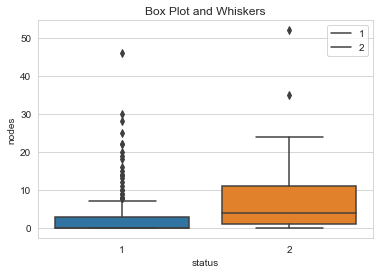

In [23]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box Plot and Whiskers");
plt.legend(['1','2'],loc='upper right')
plt.show()

**Box whiskers plot only difference is instead of box histogram will represents spread of data**

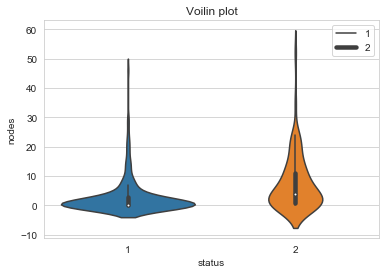

In [24]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("Voilin plot");
plt.legend(['1','2'],loc='upper right')
plt.show()

**Contour plots are like density plot**

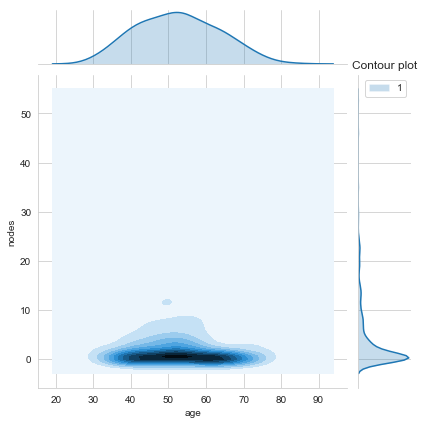

In [25]:
sns.jointplot(x="age", y="nodes", data=haberman, kind="kde");
plt.title("Contour plot");
plt.legend(['1'],loc='upper right')
plt.show();


* **if the number of data is more on specific point that area will get darker and if you visualise**
* **it will make hill like structure where hill top has maximum density of point and density decreases as hill slope getting decreases**

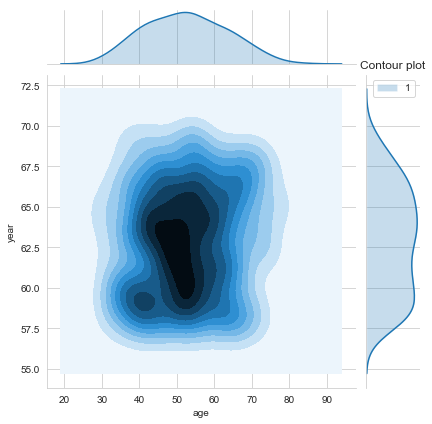

In [26]:
sns.jointplot(x="age", y="year", data=haberman, kind="kde");
plt.title("Contour plot");
plt.legend(['1'],loc='upper right')
plt.show();


**if the number of data is more on specific point that area will get darker and if you visualise it will make hill like structure where hill top has maximum density of point and density decreases as hill slope getting decreases**

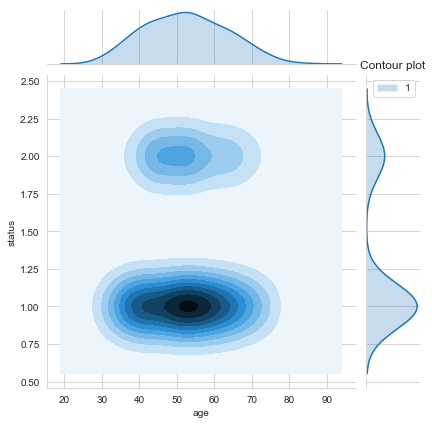

In [27]:
sns.jointplot(x="age", y="status", data=haberman, kind="kde");
plt.title("Contour plot");
plt.legend(['1','2'],loc='upper right')
plt.show();


# Conclusion:


   **Yes, we can diagnose the Cancer using Haberman’s Data set by applying various data analysis techniques and using various Python libraries.**
    